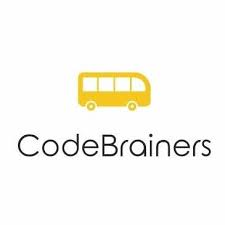

# Git

_Mikołaj Leszczuk_

## Konspekt

W tym module nauczymy się podstaw obsługi gita z poziomu terminala.

Dowiemy się jak skonfigurować gita oraz GitHuba, żeby nam poprawnie działały. Poznamy podstawowe słownictwo i komendy:

* tworzenia pustego repozytorium,
* ściągania istniejącego repozytorium,
* sprawdzania stanu repozytorium,
* zapisywania zmian,
* przeglądania historii, przywracanie wersji historycznych.

Ponadto poznamy sposoby na pracę zespołową, gałęzie i metody rozwiązywania konfliktów

## Git

### Wstęp

Oprogramowanie do kontroli wersji pomaga kontrolować co i kiedy zrobiliśmy z danym programem lub zestawem programów. Może służyć też do zapisywania kolejnych wersji naszych plików. To zwykle jest o wiele lepsze od sytuacji z poniższego obrazka:

![](https://pbs.twimg.com/media/ELV8JYDWoAIzvo8.jpg)

### Kontrola wersji

Kontrola wersji może służyć zapisowi kolejnych wersji dokumentów.

![](https://ucsbcarpentry.github.io/2019-10-24-gitbash/fig/play-changes.svg)

W ten sposób w każdej chwili możemy powrócić do poprzednich wersji naszej pracy i coś odzyskać lub poprawić.

Nad danym dokumentem może pracować kilka osób i wtedy zwykle prowadzi to do kilku wersji tekstów

![](https://bham-carpentries.github.io/2019-02-22-bham_git-novice/fig/versions.svg)

Jeżeli zmiany zostaną dokonane w tej samej części dokumentu rodzi się konflikt, którą wersję wybrać:

![](https://reproducible-analysis-workshop.readthedocs.io/en/latest/_images/merge.svg)

Systemy kontroli umożliwiają łatwe zarządzanie nie tylko zmianami w projekcie, ale również pozwalają zmniejszać liczbę powstających konfliktów między wersjami oraz ułatwiają rozwiązanie tych, które powstały. Są one stworzone po to by śledzić zmiany w dokumentach, decydować którą wersję w czasie konfliktu zachować tworząc nową wersję dokumentów oraz trzymają pełną historię zmian. Kompletna historia wszystkich zmian w pikach oraz wszystkich wersji plików tworzy **repozytorium**.

### Pierwsze kroki - konfiguracja Git

Przed uruchomieniem po raz pierwszy Gita musimy skonfigurować jego środowisko. Git potrzebuje od nas informacji o

* naszej tożsamości 
* naszym e-mailu

W linii poleceń (inaczej nazywanej konsolą czyli tekstowym trybie użytkownika) polecenia Gita podawane są jako `git polecenie opcje`, gdzie `polecenie` to rzecz, którą chcemy zrobić a `opcje` zawierają dodatkowe informacje, które mogą być potrzebne dla `polecenia`.

#### Informacja o użytkowniku

Najpierw podajmy informacje o użytkowniku

In [ ]:
git config --global user.name "Mikołaj Leszczuk"

In [ ]:
git config --global user.email "mikolaj@leszcz.uk"

Ponieważ używamy opcji `--global` będziemy musieli to zrobić tylko raz dla naszego konta na naszym komputerze. Dla innego komputera będziemy musieli powtórzyć tą konfigurację.

#### Konwersja plików

Ponieważ pliki między systemami się różnią jeżeli chodzi o koniec linii może to powodować pewne różnice w zachowaniu Gita gdy pracujemy na różnych komputerach. W skrócie chodzi o to, że Windows kończy linię tekstu znakami `CRLF` a Unix (Linux oraz macOS) znakami `LF`, co powoduje, że poprawnie sformatowany plik na Unixie na Windowsach będzie traktowany jakby zawierał tylko jedną linię. Więcej informacji p tym problemie można znaleźć na stronie [Githuba](https://help.github.com/articles/dealing-with-line-endings/).

W celu uniknięcia tych problemów na Windows wykonajmy polecenie:

In [ ]:
git config --global core.autocrlf true

a na macOS oraz Linux:

In [ ]:
git config --global core.autocrlf input

#### Ustawienie domyślnego edytora

Przy zapisywaniu kolejnych zmian do repozytorium, każda z nich musi być opisana. W tym celu Git będzie potrzebował użyć jakiegoś edytora tekstów. W naszym przypadku będzie to nano, zatem musimy dodać taką informacje do konfiguracji

In [ ]:
git config --global core.editor "nano -w"

#### Listowanie konfiguracji

Po wszyskich powyższych działaniach możemy sprawdzić czy wszystko zostało dobrze skonfigurowane

In [ ]:
git config --list

W przypadku jakichkolwiek problemów możemy wykonać polecenie

In [ ]:
git config -h

In [ ]:
git config --help

Git ma bardzo dobrą dokumentacje dla każdego z jego `poleceń`. Wywołujemy ją komendą `git polecenie -h` lub `git polecenie --help`

### Tworzenie repozytorium

Utwórzmy nowe repozytorum Gita. W tym celu uruchommy terminal, przenieśmy się na Desktop, utwórzmy katalog repozytorium oraz wejdźmy do niego.

In [ ]:
cd ~/Desktop/

In [ ]:
rm -rf repozytorium

In [ ]:
mkdir repozytorium

In [ ]:
cd repozytorium

Tak przygotowany katalog o nazwie repozytorium będzie naszym miejscem pracy.

In [ ]:
ls

Samo repozytorium tworzymy poleceniem

In [ ]:
git init

Sprawdźmy co zmieniło się w katalogu, w którym utworzyliśmy repozytorium poleceniem:

In [ ]:
ls

Katalog wygląda na pusty, sprawdźmy jednak czy nie pojawiły się jakieś ukryte pliki lub katalogi poleceniem:

In [ ]:
ls -a

Utworzony poleceniem `git init` katalog ukryty `.git` będzie zawierać wszystkie informacje, które Git zbiera o powstałym repozytorium. Jeżeli skasujemy ten podkatalog tj. `.git`, skasujemy wszystkie informacje o historii i zmianach naszym projekcie.

### Sprawdzanie statusu

Sprawdźmy czy repozytorium Gita powstało oraz czy wszytko poszło dobrze:

In [ ]:
git status

> ##### Info
> Poleceniem `git status` będziemy sprawdzać zmiany, które zrobiliśmy w naszym projekcie oraz ich status w repozytorium Gita.

### Śledzenie zmian

Utwórzmy pierwszy plik w katalogu `repozytorium` o nazwie `pierwszy.txt`.

Zapiszmy w zawartości pliku `pierwszy.txt` nasz pierwszy dzisiaj tekst:

In [ ]:
echo "Witaj świecie. Tutaj pierwszy plik." > pierwszy.txt

In [ ]:
cat pierwszy.txt

Sprawdźmy zawartość katalogu poleceniem:

In [ ]:
ls

Jak widzimy w katalogu pojawił się nam plik `pierwszy.txt`.

Sprawdźmy o czym poinformuje nas Git poleceniem:

In [ ]:
git status

Jak widać nasz plik `pierwszy.txt` nie jest jeszcze włożony do repozytorium i Git nie śledzi jego zmian. Możemy to zmienić poleceniem `git add <plik(i)>`:

In [ ]:
git add pierwszy.txt

Sprawdźmy jak zmienił się stan repozytorium:

In [ ]:
git status

W tej chwili Git już wie, że powinien śledzić zmiany w pliku `pierwszy.txt` i jest gotowy do dołożenia go do repozytorium. W tym celu wykonamy polecenie `git commit`:

In [ ]:
git commit -m "Pierwsza wersja pliku pierwszy.txt"

Sprawdźmy jak zmienił się stan repozytorium:

In [ ]:
git status

Kolejne zmiany w repozytorium możemy sprawdzić poleceniem `git log`:

In [ ]:
git log

Każda taka zmiana zapisana w repozytorium nazywa się **`commit`**.

Opcja `git log` ma również kilka wariantów np.:

In [ ]:
git log --oneline

Wyświetla ona tylko podstawowe informacje dla każdego "commitu".

Zmieńmy teraz plik `pierwszy.txt` i dodajmy kolejną linijkę:

In [ ]:
echo "Dziś jest piekny dzień." >> pierwszy.txt

In [ ]:
cat pierwszy.txt

Sprawdźmy status repozytorium:

In [ ]:
git status

Widzimy, że pojawiły się zmiany w pliku `pierwszy.txt`, których jeszcze nie zapisaliśmy do repozytorium. Informacja o wszystkich zmianach możemy wyświetlić poleceniem:

In [ ]:
git diff

Dodajmy te zmiany do repozytorium poleceniem `git add pierwszy.txt`, a następnie `git commit -m "Wiadomość"`:

In [ ]:
git add pierwszy.txt

In [ ]:
git commit -m "Pierwsze zmiana w pliku pierwszy.txt"

#### Staging area

Za każdym razem zanim zapiszemy zmiany w repozytorium poleceniem `git commit` wkładamy rzeczy gotowe do zapisu do tzw. "staging area" poleceniem `git add`.

![](https://swcarpentry.github.io/git-novice/fig/git-staging-area.svg)

Dodajmy kolejną zmianę w pliku `pierwszy.txt`:

In [ ]:
echo "Poznajemy Git." >> pierwszy.txt

In [ ]:
cat pierwszy.txt

Sprawdźmy powstałe zmiany poleceniem:

In [ ]:
git diff

Dodajmy zmiany poleceniem:

In [ ]:
git add pierwszy.txt

Sprawdźmy zmiany:

In [ ]:
git diff

Sprawdźmy zmiany, które są już przygotowane do kolejnej wersji repozytorium:

In [ ]:
git diff --staged

I dodajmy je do repozytorium w drugiej operacji `commit`:

In [ ]:
git commit -m "Druga zmiana w pliku pierwszy.txt"

#### Poprawa w ostatniej zapisanej zmianie

Czasem zdaża się, że nie zapomnieliśmy dodać czegoś do ostatniej operacji `commit`, wtedy zawsze możemy dodać brakujące pliki do staging area i wykonać polecenie:

```sh
git commit --amend
```

Gdy chcemy jedynie zmienić opis zmiany możemy wykonać polecenie:

In [ ]:
git commit --amend -m "Poprawiony opis zmiany"

### Sprawdzanie historii i przywracanie stanu

W każdej chwili można sprawdzić historie projektu poleceniem `git log`, które wyświetli opisy kolejnych operacji `commit` do repozytorium.

In [ ]:
git log

W celu wyświetlenia zawartości każdej zapisanej zmiany w repozytorium (czyli operacji `commit`) możemy wydać polecenie `git show <hash-operacji-commit>`, gdzie `<hash-operacji-commit>` jest unikalnym identyfikatorem danej zmiany w repozytorium, np. `dd6efe19bcf632eb3f43c0b5815fecbba6adc6d6`. Innym sposobem podejrzenia danej zmiany jest użycie aliasu `HEAD` lub `HEAD~x`, gdzie `HEAD` jest nazwą ostatniego zapisanej zmiany a `HEAD~x` nazwą `x+1` zmiany od końca, np. `HEAD~2` będzie trzecią zmianą od końca.

In [ ]:
git show 25db7d450ea662ed8d92aceb7f0cf4649b14923a

In [ ]:
git show HEAD~1

Jeżeli chcemy zobaczyć jak zmienił się dany plik między zmianami w repozytorium możemy wykonać polecenie `git diff <hash-1-operacji-commit> <hash-2-operacji-commit> <nazwa-pliku>`, lub `git diff <hash-operacji-commit> <nazwa-pliku>` w przypadku gdy chcemy sprawdzić tylko ostatni plik.

In [ ]:
git diff HEAD~1 pierwszy.txt

In [ ]:
git diff HEAD~2 pierwszy.txt

#### Przywracanie stanu z poprzedniej wersji repozytorium

Jeżeli chcemy wrócić do poprzedniej wersji pliku powinniśmy wykonać polecenie `git checkout <hash-operacji-commita> <nazwa-pliku>`, gdzie `<hash-operacji-commit>` to nazwa zmiany, do której chcemy powrócić a `<nazwa-pliku>` to nazwa pliku, który chcemy przywrócić. W przypadku gdy po prostu chcemy wyczyścić zmiany w naszej przestrzeni roboczej i powrócić do ostatniej wersji zapisanego pliku w repozytorium używamy polecenia `git checkout -- <nazwa-pliku>` (ewentualnie `git checkout HEAD <nazwa-pliku>`).

In [ ]:
git checkout HEAD pierwszy.txt
cat pierwszy.txt

![](https://hsf-training.github.io/analysis-essentials/_images/git-checkout.svg)

Poniższy rysunek wyjaśnia w formie graficznej jak działa repozytorum Gita:

![](https://ucsbcarpentry.github.io/2019-10-24-gitbash/fig/git_staging.svg)

### Ignorowanie plików i katalogów

Nie zawsze chcemy by Git śledził wszystkie pliki, które są obecne w katalogu projektu. W tym celu tworzymy plik `.gitignore`, w którym zapisujemy wszystkie rzeczy, które mają być pomijane przez Gita.

In [ ]:
touch ignored.txt

In [ ]:
ls

In [ ]:
echo "ignored.txt" > .gitignore

In [ ]:
ls -a

In [ ]:
git add .gitignore

In [ ]:
git commit -m "Ignoruj rzeczy, które zdefiniowalismy w pliku .gitignore"

In [ ]:
git status

W celu sprawdzenia plików i katalogów pomijanych przez gita wykonajmy polecenie `git status --ignored`:

In [ ]:
git status --ignored

### Repozytoria zdalne

#### Klonowanie repozytorium zdalnego

Wiele repozytorium Gita jest przechowywane na serwerach zdalnych takich jak [GitHub](https://github.com/), [GitLab](https://gitlab.com/), [Bitbucket](https://bitbucket.org/) lub hostowane przez niezależne instytucje lub osoby np. [PLGrid](https://git.plgrid.pl/). Jeżeli chcemy pobrać takie repozytorium i utworzyć jego lokalną kopię powinniśmy wykonać polecenie:

```sh
git clone <url-do-repozytoium> <scieżka-na-lokalną-kopię>
```

#### Dodawanie repozytorium zdalnego

Git umożliwia łączenie repozytorium lokalnego z repozytoriami zdalnymi umieszczonymi na serwerach repozytorium. W celu dodania zdalnego repozytorium (tzw. `remote`) należy wykonać polecenie:

```sh
git remote add <alias> <url-do-repozytorium>
```

Gdzie `<alias>` jest naszą lokalną etykietą zdalnego repozytorium a `<url-do-repozytorium>` to odnośnik do zdalnego repozytorium w postaci linka.

> ##### Odnośniki do repozytorium zdalnego
> Repozytoria zdalne mogą być zdefiniowane przez odnośnik [`https://`](https://) (np. [`https://github.com/<username>/repo.git`](https://github.com/<username>/repo.git)) lub [`ssh`]() ([`git@github.com:<username>/repo.git`]()).\
> Przykładowo, repozytorium `CodeBrainers` użytkownika `miklesz` na [`GitHub`](https://github.com/) dodajemy do repozytorium
> * odnośnik [`https://`](https://)

In [ ]:
git remote add github https://github.com/miklesz/CodeBrainers.git

> * odnośnik [`ssh`]()

In [ ]:
git remote add github git@github.com:miklesz/CodeBrainers.git

> Dla każdego zdalnego repozytorium mamy dwa odnośniki
> * `fetch` do pobierania zmian z repozytorium zdalnego i dodawania ich do repozytorium lokalnego
> * `push` do wysyłania zmian z repozytorium lokalnego do repozytorium zdalnego

Sprawdzamy repozytoria zdalne skonfigurowane dla naszego lokalnego repozytorium poleceniem `git remote -v`:

In [ ]:
git remote -v

### Modyfikacja parametrów repozytorium zdalnego

Jeżeli repozytorium zdalne zmieniło swój adres na `<nowy-url>` możemy go zmienić poleceniem:

```sh
git remote set-url <alias> <nowy-url>
```

Usuwanie informacji o zdalnym repozytorium z naszego lokalnego umożliwia komenda:

```sh
git remote del <alias-do-repozytoium>
```

W celu wypchnięcia nowych zmian zapisanych w commitach z repozytorium lokalnego należy użyć komendy `git push`:

```sh
git push <alias-do-repozytorium> <gałąź>
```

Do pobrania zmian z zdalnego repozytorium służy komenda `git pull`:

```sh
git pull <alias-do-repozytorium> <gałąź>
```

### Gałęzie

Gałęziami nazywamy równorzędne wersje projektu, najczęściej rozwijające pewne funkcjonalności (lub np. łatające błędy) poza główną linią projektu. Najczęściej te gałęzi są później dołączane do głównej linii (`master`) projektu.

Utworzenie nowej gałęzi:

```sh
git branch <nazwa-gałęzi>
```

Wyświetlenie gałęzi lokalnych w repozytorium:

```sh
git branch nowa-funkcja
git branch
* master
  nowa-funkcja
```

Zmiana aktualnej gałęzi:

```sh
git checkout <nazwa-gałęzi>
```

### Konflikty

Konfliktem nazywamy równorzędne zmiany w tych samych liniach kodu. Przykładowo chcemy połączyć zmiany od współpracownika A oraz od współpracownika B, ale niestety te zmiany zaszły na tych samych liniach w tym samym pliku. Jak wtedy mamy zdecydować, która zmiana powinna zostać?

![](https://imperialcollegelondon.github.io/git-novice/fig/conflict.svg)

Serwisy typu GitHub, GitLab czy BitBucket często wyświetlają informacje o możliwości zmerge'owania (przyłączenia) innej gałęzi bez konfliktów, ewentualnie wyświetlają te konflikty.

Konflikt możemy wywołać również na swoim komputerze, bez uczestnictwa drugiej osoby. Wystarczy do tego użyć gałęzi:

* przejdź na gałąź master (`git checkout master`)

In [ ]:
git checkout master

* utwórz gałąź np. konflikt (`git branch konflikt`)

In [ ]:
git branch konflikt

* wyedytuj istniejący plik, np. `pierwszy.txt`

In [ ]:
echo "to jest treść z gałęzi master" > pierwszy.txt

In [ ]:
cat pierwszy.txt

* zapisz zmiany (`git add pierwszy.txt`, `git commit`)

In [ ]:
git add pierwszy.txt

In [ ]:
git commit -m "Zapisujemy zmiany"

* przejdź na gałąź konflikt (`git checkout konflikt`)

In [ ]:
git checkout konflikt

* wyedytuj ten sam plik `pierwszy.txt`, najlepiej wprowadzając inne zmiany

In [ ]:
echo "to jest inna treść z gałęzi konflikt" > pierwszy.txt

In [ ]:
cat pierwszy.txt

* zapisz zmiany (`git add pierwszy.txt`, `git commit`)

In [ ]:
git add pierwszy.txt

In [ ]:
git commit -m "Zapisujemy inne zmiany"

* przejdź z powrotem na gałąź master (`git checkout master`)

In [ ]:
git checkout master

* dokonaj przyłączenia gałęzi konflikt (`git merge konflikt`)

In [ ]:
git merge konflikt

Powstanie konflikt na pliku `pierwszy.txt`. Informacje z `git status` pozwolą na jego rozwiązanie:

In [ ]:
git status

Konflikt oznaczany jest w następujący sposób:

In [ ]:
cat pierwszy.txt

`<<<<<<<`, `=======` i `>>>>>>>` są markerami konfliktu. Należy wybrać jedną wersję (pomiędzy `<<<<<<<` i `=======` ALBO pomiędzy `=======` i `>>>>>>>`) i resztę linii skasować.

W powyższym przykładzie, po wyczyszczeniu konfliktu, plik wyglądałby następująco (wybrana wersja z gałęzi `konflikt`):

In [ ]:
echo "to jest inna treść z gałęzi konflikt" > pierwszy.txt

In [ ]:
cat pierwszy.txt

Dalsze kroki pokaże nam `git status`:

In [ ]:
git status

Należy oznaczyć **ręcznie**, że plik ma rozwiązany konflikt:

In [ ]:
git add pierwszy.txt

I kontynuować przyłączanie zgodnie z instrukcjami z `git status`:

In [ ]:
git status

In [ ]:
git commit -m "Merge branch 'konflikt'"